<b>Aktywność 7</b><br>
Niezbędne biblioteki: geopandas, mapclassify, matplotlib, numpy, pandas

<b>Ćwiczenie 1.</b> Wczytaj dane z pliku ``YKR_grid_EPSG3067.gpkg`` do obiektu typu GeoDataFrame o nazwie <i>grid</i>.

In [17]:
import geopandas as gpd

grid = gpd.read_file("YKR_grid_EPSG3067.gpkg")

<b>Ćwiczenie 2.</b> Wczytaj dane z pliku ``travel_times_to_5944003_Itis.txt`` do obiektu typu DataFrame o nazwie <i>travel_times_Itis</i>.

In [18]:
import pandas as pd

travel_times_Itis = pd.read_csv("travel_times/travel_times_to_5944003_Itis.txt", sep=";")

<b>Ćwiczenie 3.</b> Usuń wszystkie kolumny oprócz czterech: <i>from_id</i>, <i>to_id</i>, <i>pt_r_t</i> oraz <i>car_r_t</i>.

In [19]:
travel_times_Itis = travel_times_Itis[['from_id', 'to_id', 'pt_r_t', 'car_r_t']]

<b>Ćwiczenie 4.</b> Zmień nazwy kolumn <i>pt_r_t</i> i <i>car_r_t</i> na <i>pt_r_t_Itis</i> i <i>car_r_t_Itis</i>.

In [20]:
travel_times_Itis = travel_times_Itis.rename(columns={'pt_r_t': 'pt_r_t_Itis', 'car_r_t': 'car_r_t_Itis'})

<b>Ćwiczenie 5.</b> Złącz dane ze zmiennych <i>grid</i> i <i>travel_times_Itis</i> po kolumnach <i>YKR_ID</i> i <i>from_id</i>. Zapisz je w zmiennej <i>grid</i>.

In [21]:
grid = grid.merge(travel_times_Itis, left_on='YKR_ID', right_on='from_id')

<b>Ćwiczenie 6.</b> Usuń kolumny <i>from_id</i> oraz <i>to_id</i>.

In [22]:
grid = grid.drop(columns=['from_id', 'to_id'])

<b>Ćwiczenie 7.</b> Wykonaj ponownie ćwiczenia 2-6 dla danych z pliku ``travel_times_to_5902043_Myyrmanni.txt``. Zastosuj analogiczne nazwy zmiennych oraz kolumn.

In [23]:
travel_times_Myyrmanni = pd.read_csv("travel_times/travel_times_to_5902043_Myyrmanni.txt", sep=";")
travel_times_Myyrmanni = travel_times_Myyrmanni[['from_id', 'to_id', 'pt_r_t', 'car_r_t']]
travel_times_Myyrmanni = travel_times_Myyrmanni.rename(columns={'pt_r_t': 'pt_r_t_Myyrmanni', 'car_r_t': 'car_r_t_Myyrmanni'})
grid = grid.merge(travel_times_Myyrmanni, left_on='YKR_ID', right_on='from_id')
grid = grid.drop(columns=['from_id', 'to_id'])

<b>Ćwiczenie 8.</b> Zamień wszystkie wartości -1 w zmiennej <i>grid</i> na NaN, a następnie usuń te rekordy, które zawierają wartości NaN.

In [24]:
import numpy as np

grid = grid.replace(-1, np.nan)
time_cols = ['pt_r_t_Itis', 'car_r_t_Itis', 'pt_r_t_Myyrmanni', 'car_r_t_Myyrmanni']
grid = grid.dropna(subset=time_cols)

# Alternatywne rozw.
# np.where(grid == -1, np.nan, grid)
# grid = grid.dropna(inplace=True)

<b>Ćwiczenie 9.</b> Zamień liczbę minut na przedziały czasowe o wartościach 5, 10, 15, ..., 50, 55, 60. Zapisz rezultaty w kolumnach <i>pt_r_t_cl_Itis</i>, <i>car_r_t_cl_Itis</i>, <i>pt_r_t_cl_Myyrmanni</i> oraz <i>car_r_t_cl_Myyrmanni</i>.

In [25]:
import mapclassify

classifier = mapclassify.UserDefined.make(bins = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])

grid[['pt_r_t_cl_Itis']] = grid[['pt_r_t_Itis']].apply(classifier)
grid[['car_r_t_cl_Itis']] = grid[['car_r_t_Itis']].apply(classifier)

grid[['pt_r_t_cl_Myyrmanni']] =grid[['pt_r_t_Myyrmanni']].apply(classifier)
grid[['car_r_t_cl_Myyrmanni']] = grid[['car_r_t_Myyrmanni']].apply(classifier)


<b>Ćwiczenie 10.</b> Utwórz zestaw wykresów 2x2, gdzie po lewej stronie będzie transport publiczny, po prawej podróż samochodem, u góry centrum handlowe Itis, a na dole centrum handlowe Myyrmanni.

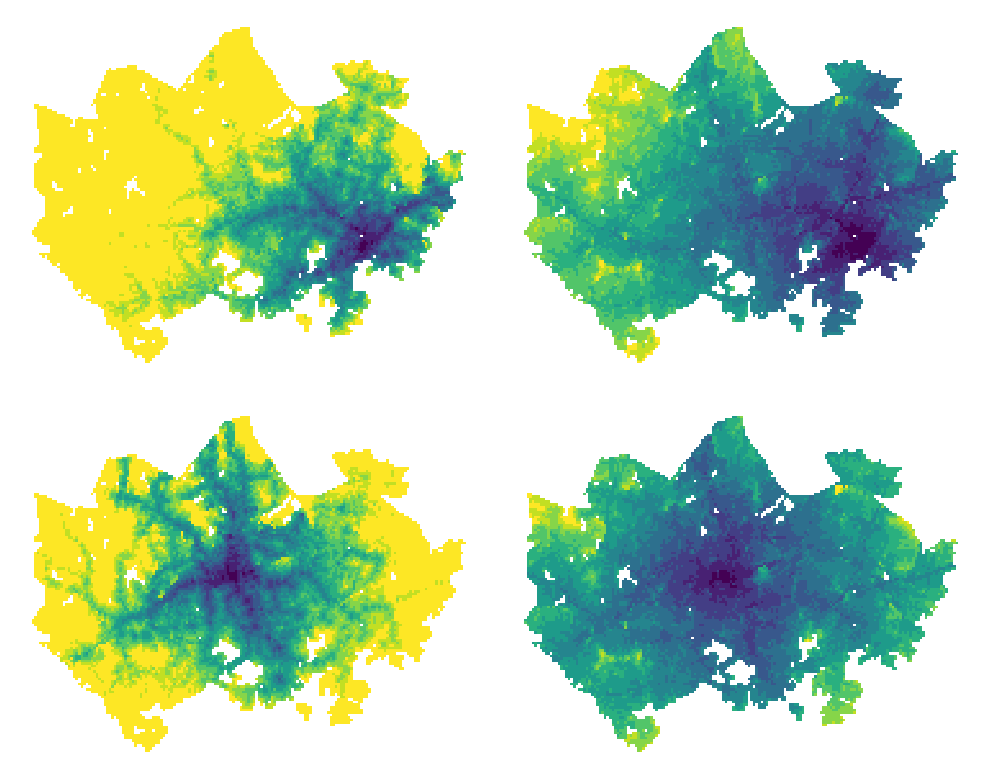

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 8))

axes = ax.flatten()
    
cols_name = ['pt_r_t_cl_Itis', 'car_r_t_cl_Itis', 'pt_r_t_cl_Myyrmanni', 'car_r_t_cl_Myyrmanni']
i = 0
while i<4 :
    axes[i].axis('off')
    grid.plot(
        ax=axes[i],
        column=cols_name[i],
        scheme='UserDefined',
        classification_kwds={'bins': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}
    )
    i+=1
plt.tight_layout()
plt.show()

<b>Ćwiczenie 11.</b> Utwórz obiekt typu GeoDataFrame o nazwie <i>grid2</i>, który będzie zawierał następujące kolumny: <i>YKR_ID</i>, <i>geometry</i>, <i>pt_r_t_Jumbo</i>, <i>pt_r_t_Dixi</i>, <i>pt_r_t_Myyrmanni</i>, <i>pt_r_t_Itis</i>, <i>pt_r_t_Forum</i>, <i>pt_r_t_IsoOmena</i> oraz <i>pt_r_t_Ruoholahti</i>. Zamień wszystkie wartości -1 w zmiennej <i>grid2</i> na NaN, a następnie usuń te rekordy, które zawierają wartości NaN.

In [27]:
files = {
    "Jumbo": "travel_times/travel_times_to_5878070_Jumbo.txt",
    "Dixi": "travel_times/travel_times_to_5878087_Dixi.txt",
    "Myyrmanni": "travel_times/travel_times_to_5902043_Myyrmanni.txt",
    "Itis": "travel_times/travel_times_to_5944003_Itis.txt",
    "Forum": "travel_times/travel_times_to_5975373_Forum.txt",
    "IsoOmena": "travel_times/travel_times_to_5978593_Iso_Omena.txt",
    "Ruoholahti": "travel_times/travel_times_to_5980260_Ruoholahti.txt"
}

grid2 = grid[['YKR_ID', 'geometry']].copy()

for centre, path in files.items():
    df = pd.read_csv(path, sep=';')
    df = df[['from_id', 'to_id', 'pt_r_t', 'car_r_t']]
    df = df.rename(columns={
        'pt_r_t': f'pt_r_t_{centre}',
        'car_r_t': f'car_r_t_{centre}'
    })
    grid2 = grid2.merge(df, left_on='YKR_ID', right_on='from_id', how='left')
    grid2 = grid2.drop(columns=['from_id', 'to_id'])

grid2 = grid2.replace(-1, np.nan)
grid2 = grid2.dropna()



<b>Ćwiczenie 12.</b> Dla każdego rekordu w zmiennej <i>grid2</i> znajdź najkrótszy czas podróży do centrum handlowego oraz najbliższe centrum handlowe. Rezultaty zapisz w kolumnach <i>min_time</i> oraz <i>shopping_centre</i>.

In [28]:
shopping_cols = [
    'pt_r_t_Jumbo',
    'pt_r_t_Dixi',
    'pt_r_t_Myyrmanni',
    'pt_r_t_Itis',
    'pt_r_t_Forum',
    'pt_r_t_IsoOmena',
    'pt_r_t_Ruoholahti'
]
grid2['min_time'] = grid2[shopping_cols].min(axis=1)
grid2['shopping_centre'] = grid2[shopping_cols].idxmin(axis=1)

<b>Ćwiczenie 13.</b> Utwórz zestaw wykresów 2x1, gdzie po lewej stronie dla każdego grida będzie zaznaczone najbliższe centrum handlowe, a po prawej stronie najkrótszy czas podróży do centrum handlowego.

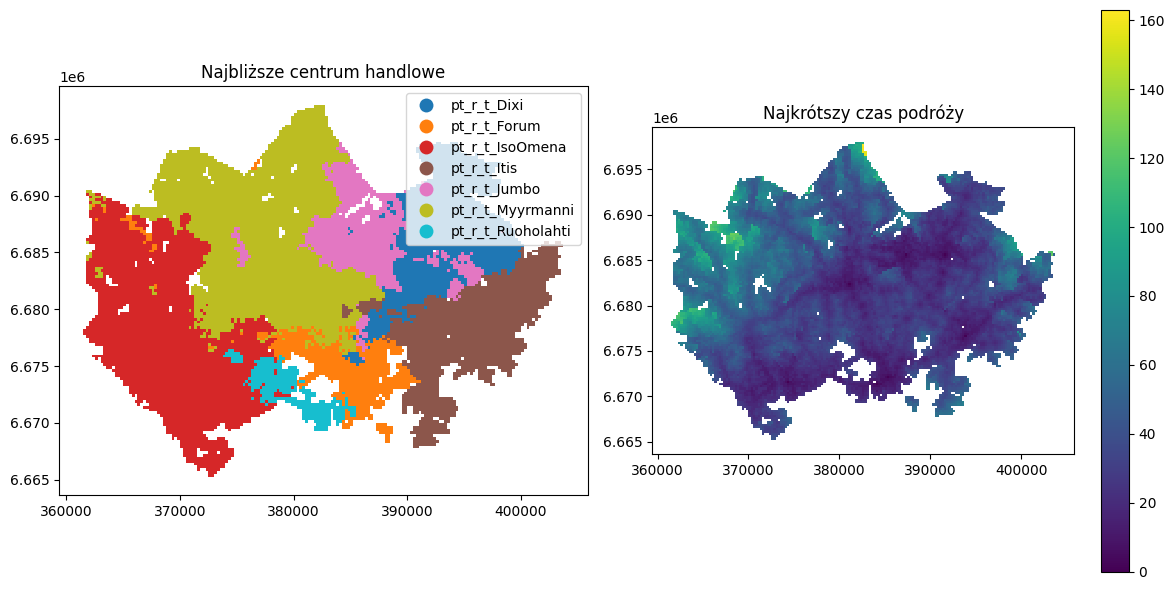

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

grid2.plot(column='shopping_centre', ax=axes[0], legend=True)
axes[0].set_title("Najbliższe centrum handlowe")

grid2.plot(column='min_time', ax=axes[1], legend=True)
axes[1].set_title("Najkrótszy czas podróży")

plt.tight_layout()
plt.show()